# CIVL562 Environmental Data Collection and Analysis Course Materials
This notebook contains the code I run during lectures. If it gets unwieldy, I may split it into multiple notebooks. <br>
Created by Tim Rodgers, 2024-08-30.

## Intro
In this lecture, we will show some Python environmental data basics. <br>
First, we are working in a "jupyter notebook". Notebooks are a convenient way to organize a scripting workflow, although I find that they get unwieldy for more complicated workflows (e.g. making lots of functions or packages). They are also a good way to share coding in a way that can be understood by a reader. <br>
One important thing to remember is that code should be comprehensible - you want people to be able to follow your code and understand what you are doing. Using lots of comments is helpful for this! Jupyter runs code in "cells", and the cell that this is in is in markdown. Markdown cells are useful for writing longer comments, and they have formatting options like <pre><code> code command here </code></pre> that can help for things like tutorials.

In [165]:
#The first thing you want to do when running a Jupyter notebook is to import packages. I typically try to have a single import cell that I run 
#when I start or restart a cell.
#Numpy is a package for doing math, especially linear algebra. I have called it "np" for convenience
import numpy as np
#Pandas gives some more functionality to numpy, giving "dataframe" objects that act like R dataframes. 
import pandas as pd
#Matplotlib is Python's basic plotting package
import matplotlib.pyplot as plt
#Seaborn is a matplotlib wrapper which provides some pre-made figure types, and good formatting options. Similar to ggplot in R.
import seaborn as sns
#python debugger (pdb) is a basic python interactive debugger. I find it isn't perfect with Jupyter, but still nice to have 
import pdb
#statsmodels - added in lecture 2 - has a number of statistical functions. If it isn't installed just run conda install statsmodels
import statsmodels as sm
#Added lecture 3 - more stats! 
import pingouin as pg

In [139]:
#Now, lets load some data! I have saved an Excel spreadsheet with data from my 2023 paper that we can play with.
#we will import as a generic dataframe (df)
df = pd.read_excel('Data/lec1_timeseries_Pine8th.xlsx')
#df.head() gives the first 5 rows of the dataframe
df.head()

,time,Qin,Qout_meas,RainRate,WindSpeed,RH,Tair,Twater,Tsubsoil,fvalveopen,...,6PPD_Min,6PPDQ_Min,Rhodamine_Min,Benzotriazole_Min,BPA_Min,Fipronil_Min,Bromide_Coutmeas,6PPDQ_Coutmeas,Rhodamine_Coutmeas,Notes
0,-24.0,0.0,0.0,0,1.388889,74.0,23.6,20.1,20.1,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,-18.0,0.0,0.0,0,1.388889,74.0,23.6,20.1,20.1,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,-12.0,0.0,0.0,0,1.388889,74.0,23.6,20.1,20.1,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,-6.0,0.0,0.0,0,1.388889,74.0,23.6,20.1,20.1,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,-3.5,0.0,0.0,0,1.388889,74.0,23.6,20.1,20.1,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [140]:
#To access data in a dataframe we use different kinds of indices. Lets build a "pltdata" df of bromide effluent concentrations
#df.loc[row,col] lets you access via the name of the column. Note that Python is case sensitive! a colon : is just everything/no selection
pltdata = df.loc[:,['time','Bromide_Coutmeas']]
#We can slice to get the positive numbers by doing a conditional index
pltdata = pltdata.loc[pltdata.time>=0,:]
pltdata.head()


,time,Bromide_Coutmeas
244,0.000000,0.0
245,0.016667,0.0
246,0.033333,0.0
247,0.050000,0.0
248,0.066667,0.0


<Axes: xlabel='Bromide_Coutmeas', ylabel='Count'>

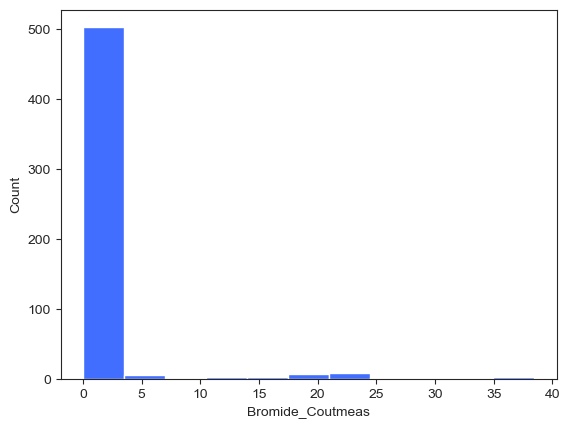

In [141]:
#Now we can do some plotting! 
#set_style lets you set different default plotting options
sns.set_style('ticks')
sns.set_palette('bright')
sns.histplot(data=pltdata, x='Bromide_Coutmeas')

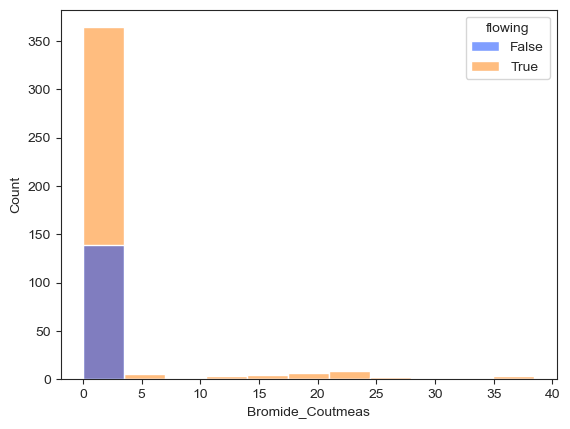

In [142]:
#We can see that mostly the data is zero - lots of time when nothing is flowing. Lets add a categorical variable to show flow
#To add a column to a dataframe, just use .loc with the new column name!
pltdata.loc[:,'Q_out'] = df.loc[df.time>=0,'Qout_meas']
pltdata.loc[:,'flowing'] = pltdata.Q_out>0
sns.histplot(data=pltdata, x='Bromide_Coutmeas',hue='flowing');


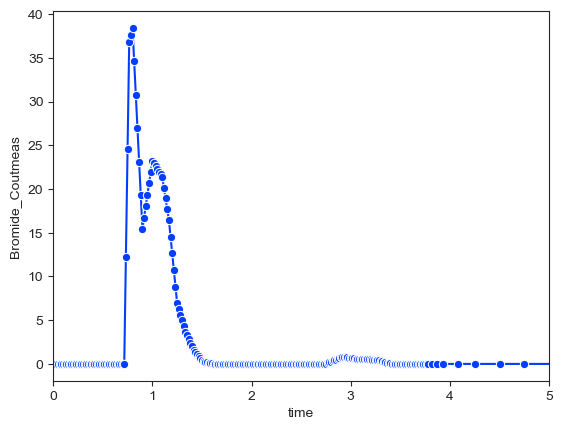

In [143]:
#Of course, we probably want to look at this as a time-series not a histogram!
#Truncating to 5 hours
ax = sns.lineplot(data=pltdata, x='time',y='Bromide_Coutmeas',marker='o');
ax.set_xlim([0,5]);

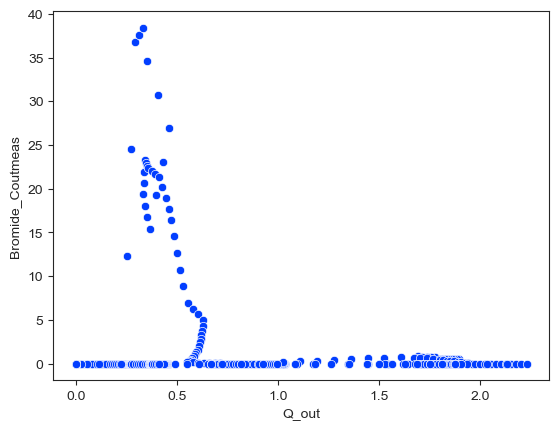

In [144]:
#Could also look at relationships with a scatterplot
#Is the bromide concentration highest with higher flows?
ax = sns.scatterplot(data=pltdata, x='Q_out',y='Bromide_Coutmeas',marker='o');
#ax.set_xlim([0,5]);

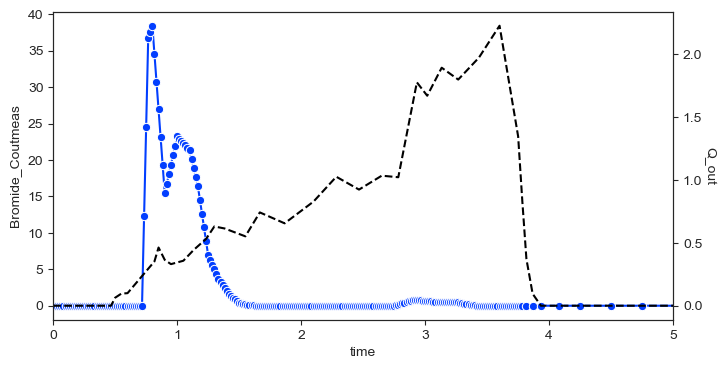

In [145]:
#Both of these are time varying so lets see what this looks like
#Truncating to 5 hours
fig,ax =plt.subplots(1,1,figsize=(8,4))
sns.lineplot(data=pltdata, x='time',y='Bromide_Coutmeas',marker='o',ax=ax);
#We can add the flow with matplotlib - slightly different syntax!
ax2 = ax.twinx()
ax2.plot(pltdata.time,pltdata.Q_out,color='k',linestyle='--')
ax2.set_ylabel('Q_out',rotation=270,labelpad=10)
ax.set_xlim([0,5]);

## Lecture 2: Data Quality
Dataset to fill in here: https://docs.google.com/spreadsheets/d/1VbGDFBnGlm9Qxm7R6FWsSNDWUMqsLOBPUI-xOH9DbFQ/edit?gid=0#gid=0

In [129]:
#First, we will import our typing speed dataset
tsdf = pd.read_csv('Data/lec2_typingspeed.csv')
tsdf

,Person,Trial 1,Trial 2,Trial 3
0,Participant 1,57,60,61
1,Participant 2,87,102,84
2,Participant 3,49,54,62
3,Participant 4,26,30,29
4,Participant 5,31,35,34
5,Participant 6,65,70,65
6,Participant 7,39,46,41
7,Participant 8,68,68,65
8,Participant 9,82,73,74
9,Participant 11,44,57,69


In [147]:
#First, lets calculate the average and standard deviation for each person
tsdf.loc[:,'mean'] = tsdf.loc[:,'Trial 1':'Trial 3'].mean(axis=1)
tsdf.loc[:,'median'] = tsdf.loc[:,'Trial 1':'Trial 3'].median(axis=1)
#Pandas calculates the sample standard deviation ()
tsdf.loc[:,'sd_sample'] = tsdf.loc[:,'Trial 1':'Trial 3'].std(axis=1)
tsdf.loc[:,'sd_pop'] = tsdf.loc[:,'Trial 1':'Trial 3'].std(axis=1,ddof=0)
tsdf.loc[:,['Person','mean','median','sd_sample','sd_pop']]

,Person,mean,median,sd_sample,sd_pop
0,Participant 1,59.333333,60.0,2.081666,1.699673
1,Participant 2,91.000000,87.0,9.643651,7.874008
2,Participant 3,55.000000,54.0,6.557439,5.354126
3,Participant 4,28.333333,29.0,2.081666,1.699673
4,Participant 5,33.333333,34.0,2.081666,1.699673
5,Participant 6,66.666667,65.0,2.886751,2.357023
6,Participant 7,42.000000,41.0,3.605551,2.943920
7,Participant 8,67.000000,68.0,1.732051,1.414214
8,Participant 9,76.333333,74.0,4.932883,4.027682
9,Participant 11,56.666667,57.0,12.503333,10.208929


In [ ]:
#tsdf
ndf

In [148]:
#We can also look at the class mean across trials
tdf = pd.DataFrame(tsdf.loc[:,'Trial 1':'Trial 3'].mean(axis=0),columns=['Mean']) #Note capital here as "mean" is already a pandas method
tdf.loc[:,'median'] = tsdf.loc[:,'Trial 1':'Trial 3'].median(axis=0)
tdf.loc[:,'sd_sample'] = tsdf.loc[:,'Trial 1':'Trial 3'].std(axis=0)
tdf.loc[:,'n'] = tsdf.loc[:,'Trial 1':'Trial 3'].count(axis=0)
#And in total
print('Total Mean')
print(tsdf.loc[:,'Trial 1':'Trial 3'].mean(axis=0).mean())
tdf

Total Mean
53.256410256410255


,Mean,median,sd_sample,n
Trial 1,50.769231,49.0,20.478256,13
Trial 2,55.230769,56.0,20.559482,13
Trial 3,53.769231,61.0,18.659912,13


In [133]:
#Confidence Interval - did people get better? lets see how different the 95% confidence intervals are 
import scipy.stats
#First, we can do this manually
alpha = 0.05
tdf.loc[:,'2_5'] = tdf.Mean - tdf.sd_sample/np.sqrt(tdf.n) * scipy.stats.t.ppf((1 + (1-alpha)) / 2., tdf.n-1)
tdf.loc[:,'97_5'] = tdf.Mean + tdf.sd_sample/np.sqrt(tdf.n) * scipy.stats.t.ppf((1 + (1-alpha)) / 2., tdf.n-1)
tdf

,Mean,sd_sample,n,2_5,97_5
Trial 1,50.769231,20.478256,13,38.394344,63.144117
Trial 2,55.230769,20.559482,13,42.806798,67.654740
Trial 3,53.769231,18.659912,13,42.493159,65.045303


In [134]:
#Or, calculate directly with scipy
scipy.stats.t.interval((1-alpha),tdf.n-1,loc=tdf.Mean,scale=tdf.sd_sample/np.sqrt(tdf.n))

(array([38.39434444, 42.80679849, 42.49315893]),
 array([63.1441171 , 67.65473997, 65.04530261]))

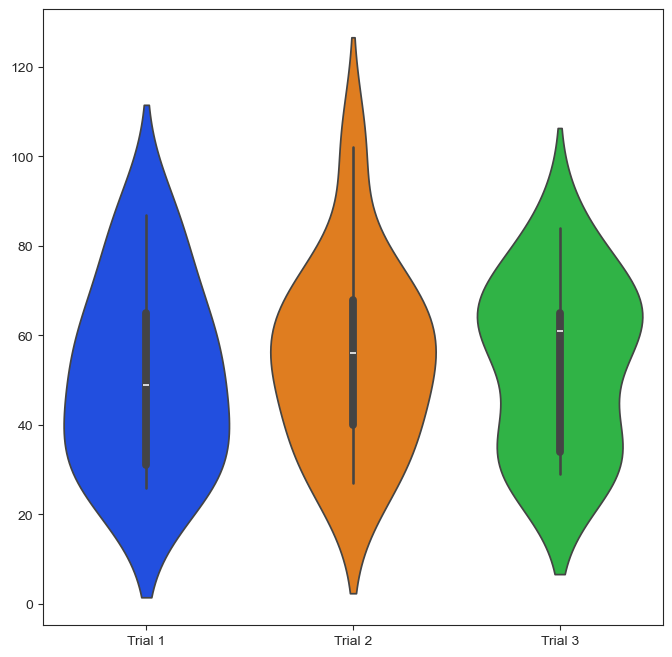

In [135]:
fig,ax = plt.subplots(figsize=(8,8))
sns.violinplot(data=tsdf.loc[:,'Trial 1':'Trial 3'],ax=ax);

In [137]:
#Lets calculate the confidence interval of the variance!
#Lets get chatGPT to help:
def confidence_interval_variance(data_column, confidence_level=0.95):
    #Made with the help of ChatGPT
    # Number of observations
    n = len(data_column)
    
    # Sample variance
    sample_variance = np.var(data_column, ddof=1)
    
    # Degrees of freedom
    df = n - 1
    
    # Confidence level alpha
    alpha = 1 - confidence_level
    
    # Chi-square critical values
    chi2_lower = scipy.stats.chi2.ppf(alpha / 2, df)
    chi2_upper = scipy.stats.chi2.ppf(1 - alpha / 2, df)
    
    # Confidence interval for the variance
    lower_bound = (df * sample_variance) / chi2_upper
    upper_bound = (df * sample_variance) / chi2_lower
    
    return lower_bound, upper_bound

In [138]:
confidence_interval_variance(tsdf.loc[:,'Trial 1':'Trial 3'],confidence_level=1-alpha)

C:\Users\Timot\.conda\envs\562env\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


(Trial 1    215.639547
 Trial 2    217.353588
 Trial 3    179.044771
 dtype: float64,
 Trial 1    1142.722382
 Trial 2    1151.805470
 Trial 3     948.798446
 dtype: float64)

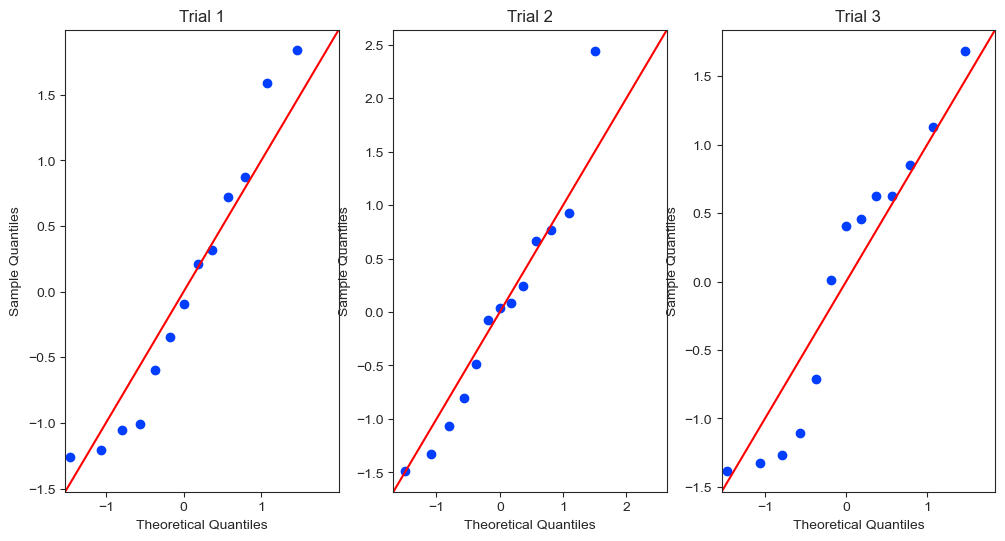

In [162]:
import statsmodels.api as sm
#New package - if you haven't installed it, go to your command prompt and type in conda insall statsmodels
import scipy.stats as stats
#Recap - Testing Normality
fig,ax = plt.subplots(1,3,figsize=(12,6))
for ind,trial in enumerate(['Trial 1','Trial 2','Trial 3']):
    sm.qqplot(tsdf.loc[:,trial],stats.t,ax=ax[ind],fit=True, line="45")
    ax[ind].set_title(trial)

## Lecture 3: Sampling and Experimental Design

In [204]:
#Import data
nwdf = pd.read_csv('Data/lec3_needlewash_factorial.csv')
nwdf.loc[:,['Solvent','6PPD_Carryover 1','6PPD-Q_Carryover 1']].groupby('Solvent').mean()


,6PPD_Carryover 1,6PPD-Q_Carryover 1
Solvent,,
IPA,0.001021,0.001374
MM,0.001998,0.010646
MeOH,0.003235,0.001867


In [205]:
#nwdf.loc[:,['Solvent','6PPD_Carryover 1','6PPD-Q_Carryover 1']].groupby('Solvent').mean()
nwdf.loc[:,['Run Date','6PPD_Carryover 1','6PPD-Q_Carryover 1']].groupby('Run Date').mean()

,6PPD_Carryover 1,6PPD-Q_Carryover 1
Run Date,,
24-Aug-22,0.004402,0.000091
24-Sep-10,0.000000,0.008282
Duplicate,0.001649,0.011974


In [203]:
pltdata = nwdf#.loc[nwdf.loc[:,'Run Date'] !='Duplicate',:]
model = pg.anova(dv='6PPD_Carryover 1',between=['Solvent','Time.1','Wash Type'], data=pltdata, detailed=True,effsize='n2')
#model = pg.anova(dv='6PPD_Carryover 1',between=['Solvent','Time.1','Wash Type'], data=nwdf, detailed=True,effsize='n2',ss_type=3)
#model = pg.anova(dv='6PPD_Carryover 1',between=['Run Date'], data=nwdf, detailed=True,effsize='n2',ss_type=3)
model

C:\Users\Timot\.conda\envs\562env\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,Source,SS,DF,MS,F,p-unc,n2
0,Solvent,2.682744e-06,2.0,1.341372e-06,0.474614,0.562058,0.025529
1,Time.1,7.560375e-07,1.0,7.560375e-07,0.267506,0.656527,0.007195
2,Wash Type,1.489884e-05,1.0,1.489884e-05,5.271613,0.148555,0.141779
3,Solvent * Time.1,2.812542e-05,2.0,1.406271e-05,4.975767,0.167343,0.267644
4,Solvent * Wash Type,1.398262e-05,2.0,6.991310e-06,2.473714,0.287876,0.133060
5,Time.1 * Wash Type,1.341372e-06,1.0,1.341372e-06,0.474614,0.562058,0.012765
6,Solvent * Time.1 * Wash Type,3.764563e-05,2.0,1.882282e-05,6.660021,0.130548,0.358239
7,Residual,5.652480e-06,2.0,2.826240e-06,NaN,NaN,NaN


In [210]:
pltdata = nwdf#.loc[nwdf.loc[:,'Run Date'] !='Duplicate',:]
model = pg.anova(dv='6PPD_Carryover 1',between=['Run Date'], data=pltdata, detailed=True,effsize='n2')
model

,Source,SS,DF,MS,F,p-unc,n2
0,Run Date,0.00003,2,0.000015,7.4246,0.031847,0.748101
1,Within,0.00001,5,0.000002,NaN,NaN,NaN
